**Part 1: Descriptive exploration & Analysis of Instacard Data** 

In [1]:
# Load librariers
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

1. **Import the data set you exported in Exercise 4.9 into a new Jupyter notebook.** 

In [2]:
#create pathway for savingg and uploading datasets
path = r'C:\Users\beatr\Documents\23-05-2023-Instacart Basket Analysis'

In [3]:
#Import dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacard_basket_merged.pkl'))

In [4]:
#check the shape of the data - how many rows /columns in our dataset
df.shape

(32404859, 35)

In [5]:
#Check data types
df.dtypes

user_id                      int64
first_name                  object
last_name                   object
sex                         object
STATE                       object
age                          int64
date_joined                 object
n_dependants                 int64
fam_status                  object
income                       int64
order_id                     int64
order_number                 int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
new_customer                  bool
product_id                   int64
add_to_cart_order            int64
reordered                    int64
Unnamed: 0_y                 int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
price_range_loc             object
busiest_day                 object
busiest_days                object
busiest_period_of_day       object
max_order           

2. **Consider any security implications that might exist for this new data.** 
**Remove the first and last names of our customers form the dataset


In [6]:
#drop columns with personally identifiable information
#drop columns that are not needed
#we drop first and last name as these columns are the only columns that could be used to trace customers
df = df.drop(columns = ['first_name', 'last_name', 'Unnamed: 0_y', '_merge'])

In [7]:
#now check shape of df
df.shape
#first name and last name removed from our data set

(32404859, 31)

**Standarized checks**
1. check for mixed data
2. check for missing values
3. check for duplicates

In [7]:
#Check for mixed data
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)
#nothing printed no mixed values
#change to str

customer_frequency


In [8]:
#change to str
df['customer_frequency'] = df['customer_frequency'].astype('str')

In [10]:
#recheck for missing values
df.isnull().sum()
#No duplicates days since prior woth 0 are new customers that have only ordered 1s

user_id                         0
sex                             0
STATE                           0
age                             0
date_joined                     0
n_dependants                    0
fam_status                      0
income                          0
order_id                        0
order_number                    0
orders_day_of_week              0
order_hour_of_day               0
days_since_prior_order    2076096
new_customer                    0
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
prices                          0
price_range_loc                 0
busiest_day                     0
busiest_days                    0
busiest_period_of_day           0
max_order                       0
loyalty_flag                    0
avg_spend                       0
spender_type                    0
median_orders 

In [11]:
#check for duplicates
df_dups = df[df.duplicated()]

In [12]:
df_dups
#no duplicates

,user_id,sex,STATE,age,date_joined,n_dependants,fam_status,income,order_id,order_number,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spender_type,median_orders,customer_frequency


In [9]:
#check basic descriptive stats
df.describe()

,user_id,age,n_dependants,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,avg_spend,median_orders
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.032876e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240485e+07
mean,1.029372e+05,4.946527e+01,1.501896e+00,9.943773e+04,1.710745e+06,1.714230e+01,2.738867e+00,1.342515e+01,1.110408e+01,2.559866e+04,8.352547e+00,5.895873e-01,7.119612e+01,9.919792e+00,1.198023e+01,3.305217e+01,1.198023e+01,1.039776e+01
std,5.946610e+04,1.848558e+01,1.118865e+00,4.305727e+04,9.872988e+05,1.753532e+01,2.090077e+00,4.246380e+00,8.779064e+00,1.408400e+04,7.127071e+00,4.919087e-01,3.821139e+01,6.281485e+00,4.956554e+02,2.515525e+01,8.324227e+01,7.131754e+00
min,1.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,5.142200e+04,3.300000e+01,1.000000e+00,6.700400e+04,8.559470e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.387298e+00,6.000000e+00
50%,1.026160e+05,4.900000e+01,2.000000e+00,9.661800e+04,1.711049e+06,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.530200e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.824786e+00,8.000000e+00
75%,1.543890e+05,6.500000e+01,3.000000e+00,1.279120e+05,2.565499e+06,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.254023e+00,1.300000e+01
max,2.062090e+05,8.100000e+01,3.000000e+00,5.939010e+05,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,9.999900e+04,9.900000e+01,2.500542e+04,3.000000e+01


3. **Create “Region” column based on the “State” column from your customers data set.**

In [10]:
# Use loc function to locate and create new column region based on
# https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States

#first region
df.loc[(df['STATE'] == 'Maine') | 
       (df['STATE'] == 'New Hampshire') |
       (df['STATE'] == 'Vermont') |
       (df['STATE'] == 'Massachusetts') |
       (df['STATE'] == 'Rhode Island') |
       (df['STATE'] == 'Connecticut') |
       (df['STATE'] == 'New York') |
        (df['STATE'] == 'Pennsylvania') |
       (df['STATE'] == 'New Jersey'), 'Region'] = 'Region 1'

In [11]:
#second region
df.loc[(df['STATE'] == 'Wisconsin') | 
       (df['STATE'] == 'Michigan') |
       (df['STATE'] == 'Illinois') |
       (df['STATE'] == 'Indiana') |
       (df['STATE'] == 'Ohio') |
       (df['STATE'] == 'North Dakota') |
       (df['STATE'] == 'South Dakota') |
       (df['STATE'] == 'Nebraska') | 
       (df['STATE'] == 'Kansas') |
       (df['STATE'] == 'Minnesota') |
       (df['STATE'] == 'Iowa') |
       (df['STATE'] == 'Missouri'), 'Region'] = 'Region 2'

In [12]:
#Third region
df.loc[(df['STATE'] == 'Delaware') | 
       (df['STATE'] == 'Maryland') |
       (df['STATE'] == 'District of Columbia') |
       (df['STATE'] == 'Virginia') |
       (df['STATE'] == 'West Virginia') |
       (df['STATE'] == 'North Carolina') |
       (df['STATE'] == 'South Carolina') |
       (df['STATE'] == 'Georgia') | 
       (df['STATE'] == 'Florida') |
       (df['STATE'] == 'Kentucky') |
       (df['STATE'] == 'Tennessee') |
       (df['STATE'] == 'Mississippi') |
       (df['STATE'] == 'Alabama') | 
       (df['STATE'] == 'Oklahoma') |
       (df['STATE'] == 'Texas') |
       (df['STATE'] == 'Arkansas') |
       (df['STATE'] == 'Louisiana') , 'Region'] = 'Region 3'

In [13]:
# Region 4
df.loc[(df['STATE'] == 'Idaho') | 
       (df['STATE'] == 'Montana') |
       (df['STATE'] == 'Wyoming') |
       (df['STATE'] == 'Nevada') |
       (df['STATE'] == 'Utah') |
       (df['STATE'] == 'Colorado') |
       (df['STATE'] == 'Arizona') |
       (df['STATE'] == 'New Mexico') | 
       (df['STATE'] == 'Alaska') |
       (df['STATE'] == 'Washington') |
       (df['STATE'] == 'Oregon') |
       (df['STATE'] == 'California') |
       (df['STATE'] == 'Hawaii') , 'Region'] = 'Region 4'

In [14]:
df['Region'].value_counts(dropna = False)

Region 3    10791885
Region 4     8292913
Region 2     7597325
Region 1     5722736
Name: Region, dtype: int64

In [13]:
df.head(50)
#looks like loc function worked but we have NaN values

,user_id,sex,STATE,age,date_joined,n_dependants,fam_status,income,order_id,order_number,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spender_type,median_orders,customer_frequency,_merge,Region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Region 2
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Region 2
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Region 2
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Regularly busy,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Region 2
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Least busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Region 2
5,26711,Female,Missouri,48,1/1/2017,3,married,165665,2984525,4,...,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Region 2
6,26711,Female,Missouri,48,1/1/2017,3,married,165665,2505178,6,...,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Region 2
7,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Region 2
8,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Region 2
9,26711,Female,Missouri,48,1/1/2017,3,married,165665,518967,1,...,Regularly busy,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Region 2


In [14]:
#seperate these values to have a closer look
df_nan =df[df['Region'].isnull() == True]
df_nan
#code fixed no more null values

,user_id,sex,STATE,age,date_joined,n_dependants,fam_status,income,order_id,order_number,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spender_type,median_orders,customer_frequency,_merge,Region


3.2 **Determine whether there’s a difference in spending habits between the different U.S. regions.**

In [15]:
#check count of spenders
df['spender_type'].value_counts(dropna = False)

Low spender     31770614
High spender      634245
Name: spender_type, dtype: int64

In [16]:
#create a crosstab to determine relationship
crosstab = pd.crosstab(df['Region'], df['spender_type'], dropna = False)
crosstab.to_clipboard()
#Yes there does seem to be a difference in spending habits between regions

4. **Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.**

In [17]:
#create a new flag for number of orders less than 5
df_low = df.loc[df['order_number'] < 5, 'Activity flag'] = 'Low-activity customer'

In [18]:
df.loc[df['order_number'] >= 5, 'Activity flag'] = 'High-activity customer'

In [19]:
df.head()

,user_id,sex,STATE,age,date_joined,n_dependants,fam_status,income,order_id,order_number,...,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spender_type,median_orders,customer_frequency,_merge,Region,Activity flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Region 2,High-activity customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Region 2,High-activity customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Region 2,High-activity customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Region 2,Low-activity customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Region 2,Low-activity customer


In [20]:
#isolate low activity customer 
df_low = df.loc[df['Activity flag']  == 'Low-activity customer'] 
df_low.head()

,user_id,sex,STATE,age,date_joined,n_dependants,fam_status,income,order_id,order_number,...,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spender_type,median_orders,customer_frequency,_merge,Region,Activity flag
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Region 2,Low-activity customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Region 2,Low-activity customer
5,26711,Female,Missouri,48,1/1/2017,3,married,165665,2984525,4,...,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Region 2,Low-activity customer
9,26711,Female,Missouri,48,1/1/2017,3,married,165665,518967,1,...,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Region 2,Low-activity customer
10,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Region 2,Low-activity customer


In [21]:
#create our new dataset with high activity customers
df_high = df.loc[df['Activity flag']  == 'High-activity customer'] 

In [22]:
df_high.shape

(24414877, 35)

In [23]:
df_low.shape

(7989982, 35)

In [24]:
#export low activity customers
df_low.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'Low_acitivity_customer.pkl'))

5. **Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.**


In [26]:
#check mean income
df['income'].mean()

99437.73329450376

In [27]:
#check max dependants
df['n_dependants'].max()

3

In [28]:
# Check the criterea to filter by department
#import departments data set to identify which criteria too filter our parent / young adult
df_departments = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'))

In [29]:
# To see the departments in format for us to see which departments are most used.
df_departments.T
#identify which used likely by parent

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [31]:
#group number of orders by department
df.groupby('department_id')['order_number'].mean()

department_id
1     15.457838
2     17.277920
3     17.170395
4     17.811403
5     15.215751
6     16.439806
7     17.225802
8     15.340650
9     15.895474
10    20.197148
11    16.170638
12    15.887671
13    16.583536
14    16.773669
15    16.165037
16    17.665606
17    15.694469
18    19.310397
19    17.177343
20    16.473447
21    22.902379
Name: order_number, dtype: float64

In [19]:
#Use loc to create the new column based on the filter
df.loc[(df['n_dependants'] > 0) & 
       (df['age'] > 35) & 
       (df['income'] >= 99437) & 
       (df['department_id'] == 18), 'Profiling'] = 'Parent'

In [20]:
df.loc[(df['n_dependants'] == 0) & 
       (df['age'] <= 35) & 
       (df['income'] < 99437) & 
       (df['department_id'] != 18), 'Profiling'] = 'Non-Parent'
#both these worked as I rerun my code now not working
#No idea why recoded several times.
#got code to work 2 again changed conditions
#reopen code not working again
#suggest different method?
#All graphs and code below is for when no NaN values were returned

In [21]:
#check new column for na values
df['Profiling'].value_counts(dropna = False)


NaN           30101799
Non-Parent     2151702
Parent          151358
Name: Profiling, dtype: int64

In [22]:
#use to check and correct if needed our new column 
df_nan = df[df['Profiling'].isnull() == True]
df_nan.head(5)

,user_id,sex,STATE,age,date_joined,n_dependants,fam_status,income,order_id,order_number,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spender_type,median_orders,customer_frequency,Region,Profiling
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region 2,NaN
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region 2,NaN
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region 2,NaN
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Regularly busy,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region 2,NaN
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Least busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region 2,NaN


6. **Create an appropriate visualization to show the distribution of profiles.**

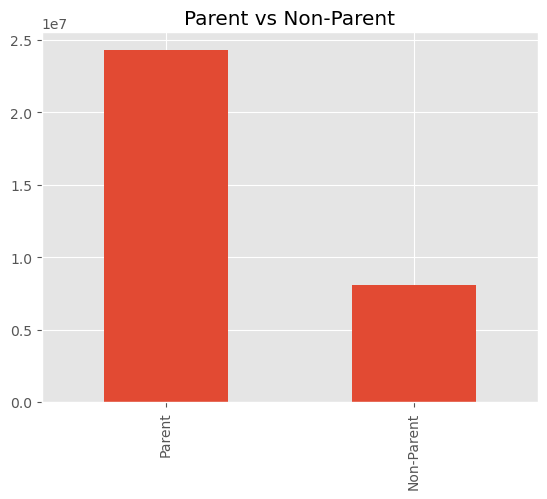

In [117]:
#use a barplot to see distribution of profiles.
#
plt.style.use('ggplot')
bar_parent_adult = df['Profiling'].value_counts().plot.bar(title = 'Parent vs Non-Parent')
bar_parent_adult.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Parent.png'))


7. **Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.**

In [118]:
# Step 1 Use our new customer profile parent or young adult
# to aggregate avg spend min/max/median to compare across region/department

#aggregate by new customer profile = customer type
df.groupby('Profiling').agg({'avg_spend': ['mean', 'min', 'max']})
#parents have less money to spend 

avg_spend                
                 mean  min        max
Profiling                            
Non-Parent  12.129243  1.0  25005.425
Parent      11.930584  1.0  12506.925

8. **Compare your customer profiles with regions and departments. Can you identify a link between them?** 

**8.1 By expendure - aggregate by the expendure of each customer**


In [39]:
#group by region average spend
df.groupby('Region').agg({'avg_spend': ['mean', 'min', 'max', 'sum']})

#seems to be a slight correlation between region 3 and our customer profile

avg_spend                                
               mean  min           max          sum
Region                                             
Region 1  11.554997  1.1   7414.485185   66126199.8
Region 2  12.715483  1.0  25005.425000   96603658.7
Region 3  12.195577  1.0  15006.940000  131613265.4
Region 4  11.319834  1.0  10209.987755   93874398.7

In [40]:
df.groupby('department_id').agg({'avg_spend': ['mean', 'min', 'max', 'sum']})
# department 5: alcohol has the highest avegerate spend
#are these young single adults or parents?

avg_spend                                      
                    mean       min           max           sum
department_id                                                 
1              12.463150  1.000000  15006.940000  2.785194e+07
2              14.232526  1.522222   5562.572222  5.165126e+05
3              13.401716  1.900000  15006.940000  1.571255e+07
4              10.391624  1.200000  14042.512281  9.850523e+07
5              27.137751  1.300000  14042.512281  4.170964e+06
6              11.508091  2.400000  10721.342857  3.098588e+06
7              12.711685  1.100000  15006.940000  3.417057e+07
8              15.222150  2.755556   6390.138298  1.487448e+06
9              12.574498  2.611111  14042.512281  1.089740e+07
10              8.423798  2.725000   2496.148259  2.912360e+05
11             13.521683  2.222222  15006.940000  6.051927e+06
12             13.055524  2.975000  15006.940000  9.255413e+06
13             12.543042  1.333333  15006.940000  2.352283e+07
14             14.801297  2.172727  10721.342857  1.040580e+07
15             12.307632  1.200000  15006.940000  1.314526e+07
16             12.471954  1.100000  25005.425000  6.733293e+07
17             15.063863  1.000000  15006.940000  1.112716e+07
18             10.268986  1.425000   4768.028571  4.352017e+06
19             11.720374  1.262500  15006.940000  3.384317e+07
20             11.106156  1.773333  10721.342857  1.167534e+07
21             11.616812  3.600000   6390.138298  8.032444e+05

**8.2 Usage frequency** - aggregate by mean orders

In [119]:
df.groupby('Profiling').agg({'median_orders': ['mean', 'min', 'max', 'sum']})
#parents order more 

median_orders                        
                    mean  min   max          sum
Profiling                                       
Non-Parent     10.367567  0.0  30.0   83951405.5
Parent         10.407817  0.0  30.0  252986458.5

In [42]:
df.groupby('Region').agg({'median_orders': ['mean', 'min', 'max', 'sum']})
#no clear difference between the number of orders and the regions

median_orders                        
                  mean  min   max          sum
Region                                        
Region 1     10.373701  0.0  30.0   59365954.5
Region 2     10.458222  0.0  30.0   79454509.0
Region 3     10.396853  0.0  30.0  112201594.0
Region 4     10.360148  0.0  30.0   85915806.5

In [43]:
df.groupby('department_id').agg({'median_orders': ['mean', 'min', 'max', 'sum']})
# no clear department with high orders
# pets department seems to be most used
# baby departments least used

median_orders                       
                       mean  min   max         sum
department_id                                     
1                 11.045802  0.0  30.0  24684518.0
2                 10.378923  0.0  30.0    376661.5
3                 10.344217  0.0  30.0  12127850.0
4                 10.128960  0.0  30.0  96015342.5
5                 10.095308  0.0  30.0   1551608.5
6                 10.699608  0.0  30.0   2880901.5
7                 10.374240  0.0  30.0  27887233.5
8                 11.091694  0.0  30.0   1083836.0
9                 11.012648  0.0  30.0   9543858.5
10                 9.397333  0.0  30.0    324894.0
11                11.005134  0.0  30.0   4925590.0
12                10.729803  0.0  30.0   7606647.0
13                10.657283  0.0  30.0  19986337.5
14                10.522282  0.0  30.0   7397511.5
15                11.012148  0.0  30.0  11761613.0
16                10.155434  0.0  30.0  54826607.5
17                11.371076  0.0  30.0   8399415.5
18                 9.094449  0.0  30.0   3854245.5
19                10.353875  0.0  30.0  29897331.0
20                10.609031  0.0  30.0  11152733.5
21                 9.445773  0.0  30.0    653128.0

9. **Produce suitable charts to illustrate your results and export them in your project folder.**

In [120]:
#create random sample of data to create this line chart
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [121]:
#create the samples big and small
big = df[dev]
small = df[~dev]

In [122]:
# test to see if length of seperated random datasets add up
len(big)+len(small)

32404859

In [123]:
# filter to exclude extreme values potential outliers
Small_filter = small.loc[small['avg_spend'] <= 15000]

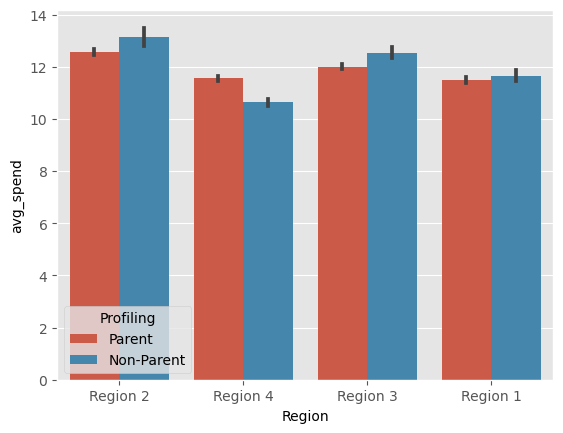

In [124]:
Barplot1 = sns.barplot(data = Small_filter, x = 'Region', y = 'avg_spend', hue = 'Profiling')
#Regions 2 and 3 have more young adults and region 4 and 1 have more parents.
#Potentail parents spend more money

In [125]:
#Save the plot
Barplot1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Profiling.png'))

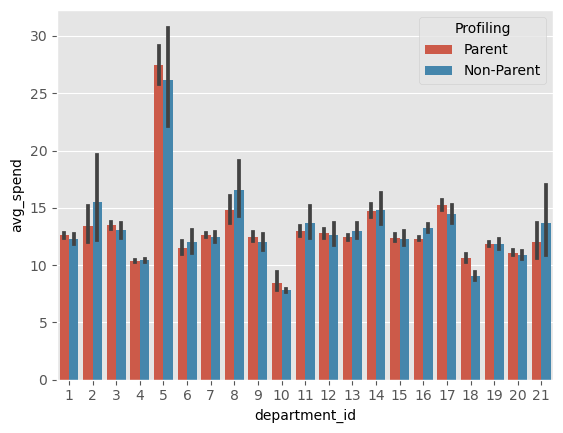

In [126]:
#create the same plot for different departments
Barplot2 = sns.barplot(data = Small_filter, x = 'department_id', y = 'avg_spend', hue = 'Profiling')
# Parents buy more produce from departments 2, 17, 18: Other, household, babies
# Parents and young adults buy alcohol.
# However young adults do buy more alcohol

In [127]:
Barplot2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Profiling.png'))

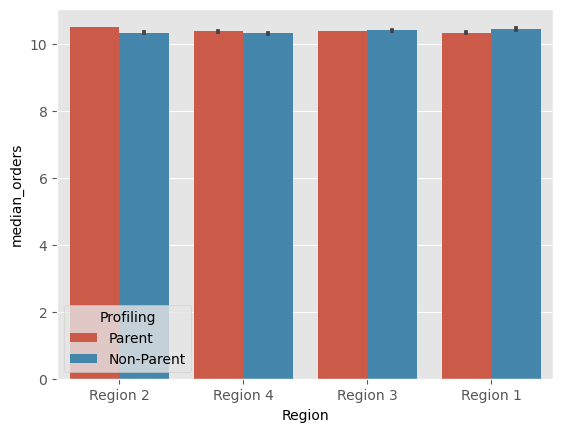

In [128]:
# 1. Create the same plots for median orders
Barplot_orders = sns.barplot(data = Small_filter, x = 'Region', y = 'median_orders', hue = 'Profiling')
#Save plot
Barplot_orders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'MedianOrders_Bar.png'))

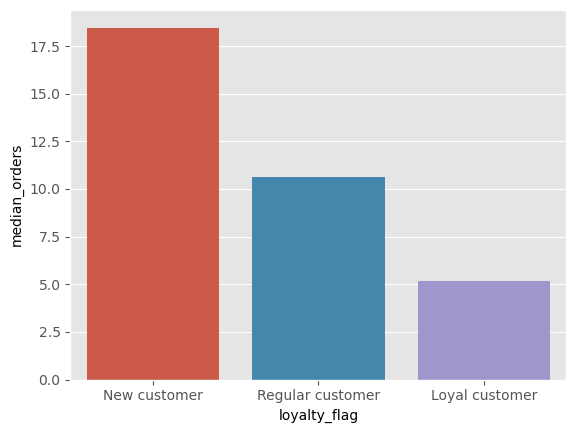

In [70]:
#2. 
Barplot3 = sns.barplot(data = small, x = 'loyalty_flag', y = 'median_orders')

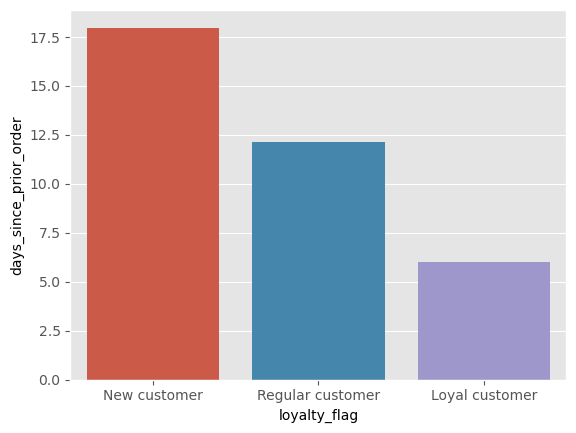

In [72]:
1#What’s the distribution among users in regards to their brand loyalty (i.e., how
Barplot4 = sns.barplot(data = small, x = 'loyalty_flag', y = 'days_since_prior_order')

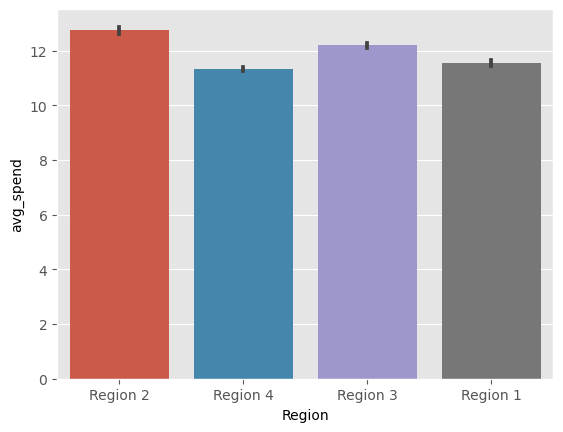

In [73]:
#3customer regions and spending habits
Barplot5 = sns.barplot(data = small, x = 'Region', y = 'avg_spend')
#Regions 2 and 3 have more young adults and region 4 and 1 have more parents.

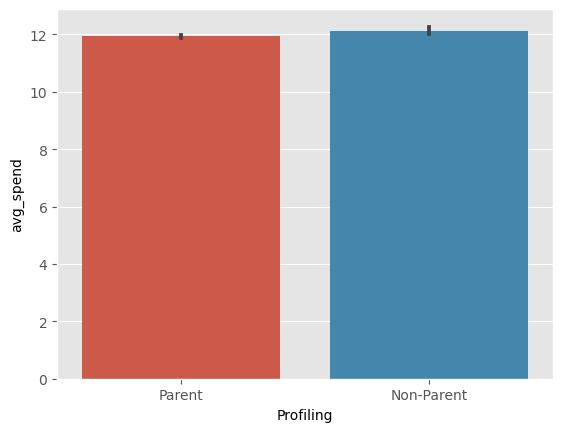

In [129]:
#parents/young adults spending habits
Barplot6 = sns.barplot(data = small, x = 'Profiling', y = 'avg_spend')
#Parents spend less 

In [77]:
Barplot3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyal_Bar_orders.png'))
Barplot4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyal_Bar_daysprior.png'))
Barplot5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_spend.png'))
Barplot5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_habits.png'))
Barplot6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_habits.png'))

In [106]:
df.shape

(32404859, 34)